In [268]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import joblib

In [22]:
dataset = pd.read_csv('../customer_behavior_analytcis.csv')


In [30]:
dataset.head()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts,customer_id
0,7.0,129.34,52.17,18.0,0.0,CM00000
1,22.0,24.18,9.19,15.0,7.0,CM00001
2,2.0,32.18,90.69,50.0,2.0,CM00002
3,25.0,26.85,11.22,16.0,10.0,CM00003
4,7.0,125.45,34.19,30.0,3.0,CM00004


In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_purchases   979 non-null    float64
 1   avg_cart_value    979 non-null    float64
 2   total_time_spent  999 non-null    float64
 3   product_click     979 non-null    float64
 4   discount_counts   999 non-null    float64
 5   customer_id       999 non-null    object 
dtypes: float64(5), object(1)
memory usage: 47.0+ KB


In [46]:
#finding null values
dataset.isnull().sum()

total_purchases     20
avg_cart_value      20
total_time_spent     0
product_click       20
discount_counts      0
customer_id          0
dtype: int64

In [50]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
total_purchases,979.0,11.570991,7.016327,0.00,6.000,10.00,17.000,32.00
avg_cart_value,979.0,75.457978,55.067835,10.26,33.130,49.38,121.255,199.77
total_time_spent,999.0,49.348759,32.730973,5.12,22.375,40.36,77.170,119.82
product_click,979.0,28.237998,16.296384,4.00,16.000,21.00,45.000,73.00
discount_counts,999.0,4.313313,4.532772,0.00,1.000,2.00,8.000,21.00


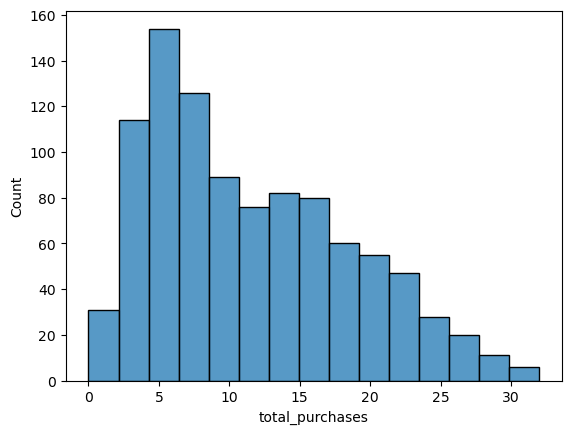

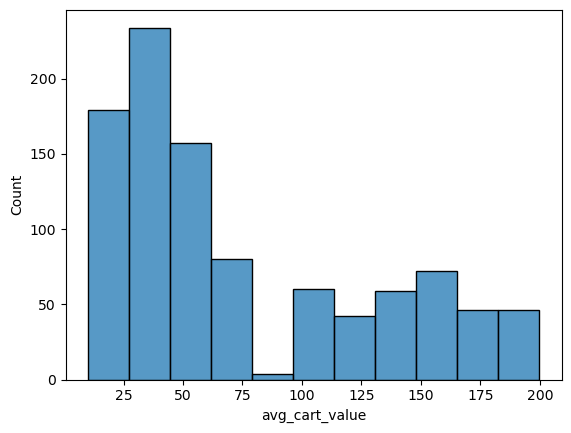

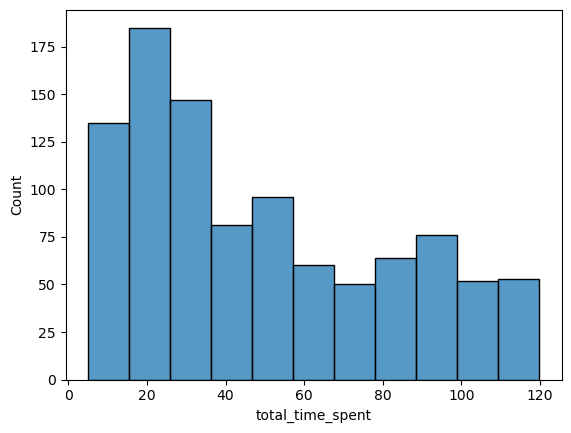

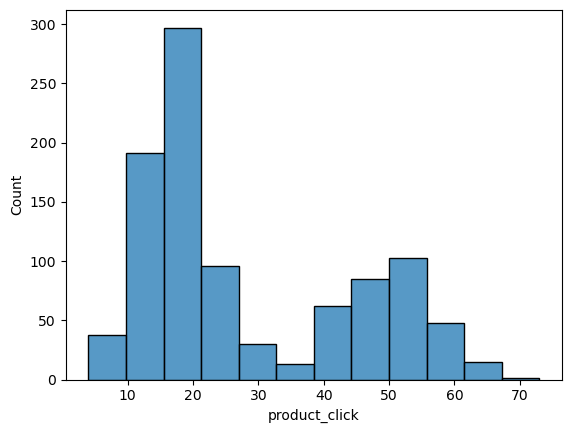

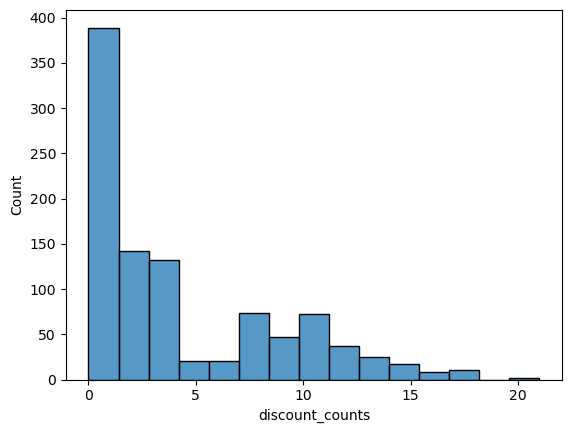

In [56]:
for i in dataset.select_dtypes(include="number").columns:
    sns.histplot(data = dataset, x=i)
    plt.show()

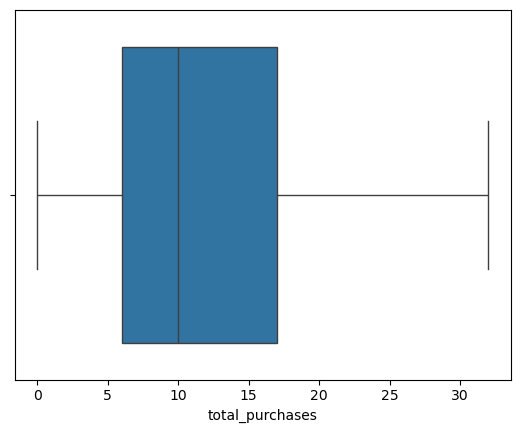

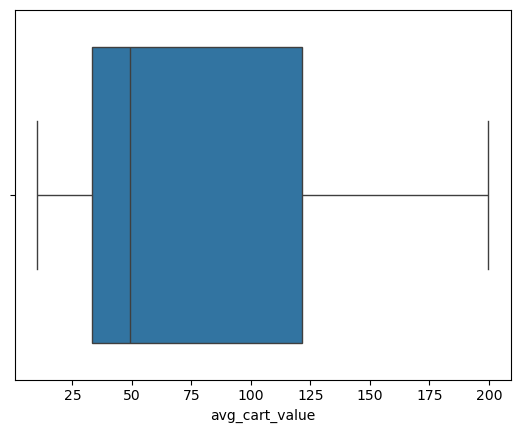

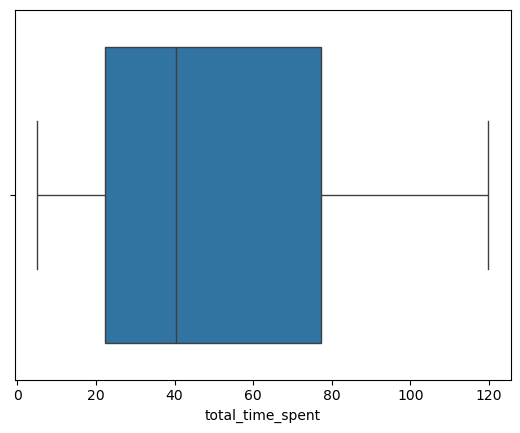

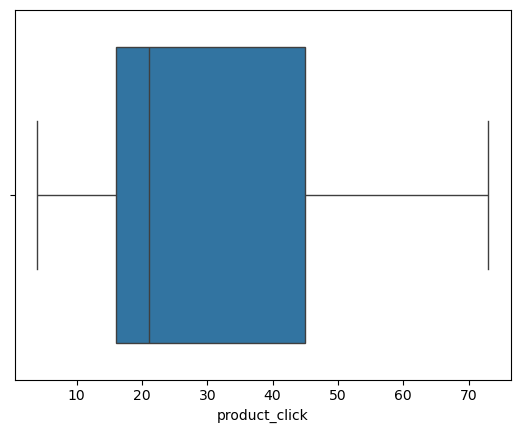

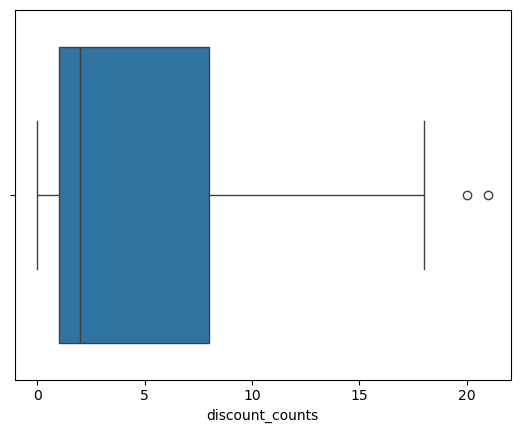

In [94]:
#boxplot 
for i in dataset.select_dtypes(include="number").columns:
    sns.boxplot(data = dataset, x=i)
    plt.show()

In [110]:
print(dataset.isnull().sum())  # Shows missing values per column
dataset = dataset.dropna()  # Drops all rows with NaN values
columns = dataset.select_dtypes(include='number').columns
numeric_data = dataset.select_dtypes(include=["number"])

total_purchases     0
avg_cart_value      0
total_time_spent    0
product_click       0
discount_counts     0
customer_id         0
dtype: int64


In [112]:
# for i in colums:
#     sns.scatterplot(data = dataset, x=i, )
columns

Index(['total_purchases', 'avg_cart_value', 'total_time_spent',
       'product_click', 'discount_counts'],
      dtype='object')

In [193]:
#normalize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

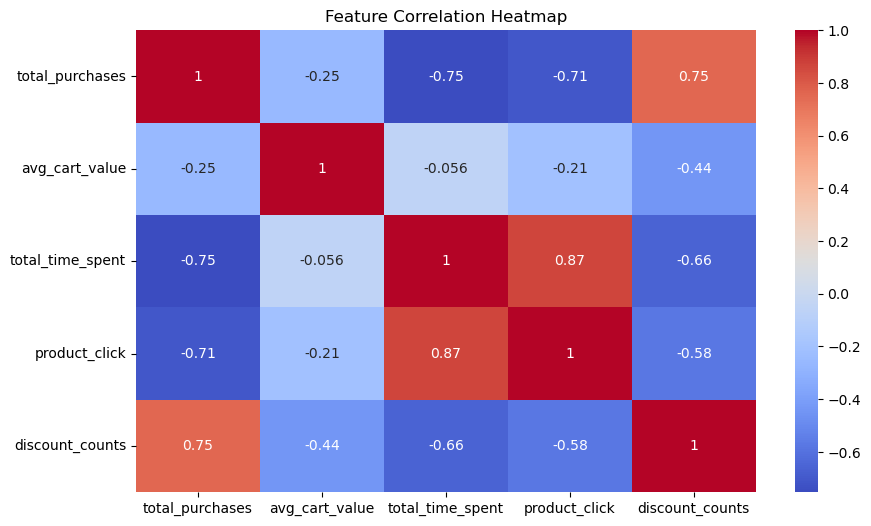

In [116]:
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

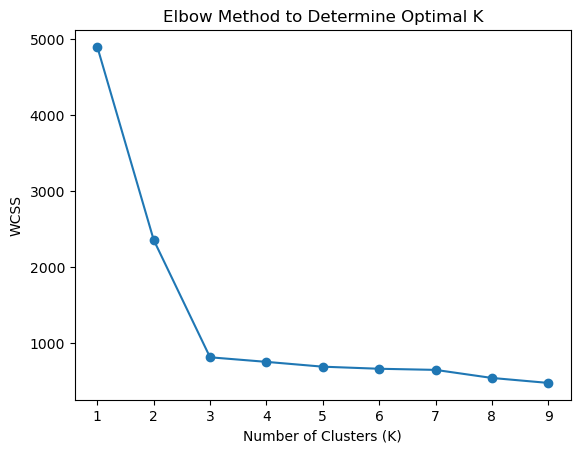

In [169]:
#finding best k
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

#plot the Elbow curve
plt.plot(range(1, 10), wcss, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method to Determine Optimal K")
plt.show()

In [171]:
# Apply K-Means with K=3
kmeans = KMeans(n_clusters=3, random_state=42)
dataset["Cluster"] = kmeans.fit_predict(scaled_data)

# Display cluster counts
print(dataset["Cluster"].value_counts())

Cluster
1    328
2    326
0    325
Name: count, dtype: int64


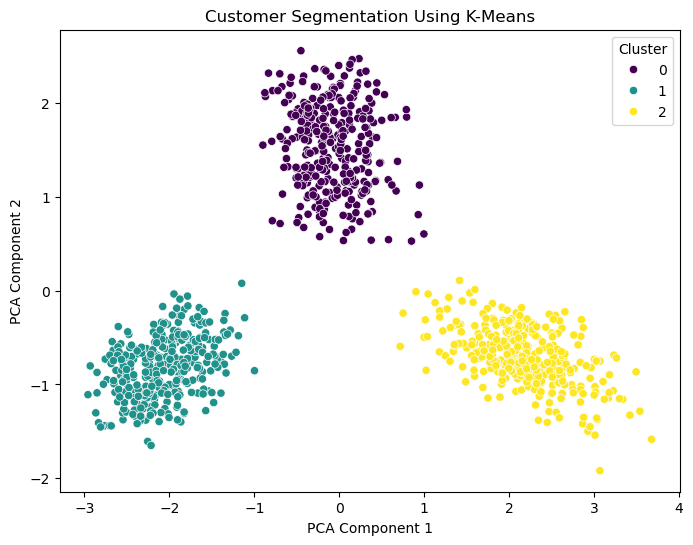

In [173]:
from sklearn.decomposition import PCA

#reduce dimensions
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=dataset["Cluster"], palette="viridis")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Customer Segmentation Using K-Means")
plt.show()


In [175]:
from sklearn.metrics import silhouette_score

#calculate silhouette score
sil_score = silhouette_score(scaled_data, dataset["Cluster"])
print(f"Silhouette Score: {sil_score:.4f}")


Silhouette Score: 0.6260


In [177]:
cluster_mapping = {0: "Bargain Hunters", 1: "High Spenders", 2: "Window Shoppers"}
dataset["Segment"] = dataset["Cluster"].map(cluster_mapping)

#display final dataset with clusters
print(dataset[["customer_id", "Segment"]].head(20))


   customer_id          Segment
0      CM00000  Bargain Hunters
1      CM00001  Window Shoppers
2      CM00002    High Spenders
3      CM00003  Window Shoppers
4      CM00004  Bargain Hunters
5      CM00005  Bargain Hunters
6      CM00006  Window Shoppers
7      CM00007  Window Shoppers
8      CM00008  Window Shoppers
9      CM00009  Window Shoppers
10     CM00010    High Spenders
11     CM00011    High Spenders
12     CM00012  Bargain Hunters
13     CM00013  Window Shoppers
14     CM00014  Bargain Hunters
15     CM00015  Bargain Hunters
16     CM00016  Window Shoppers
17     CM00017  Window Shoppers
18     CM00018  Bargain Hunters
19     CM00019  Window Shoppers


In [179]:
dataset.head()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts,customer_id,Cluster,Segment
0,7.0,129.34,52.17,18.0,0.0,CM00000,0,Bargain Hunters
1,22.0,24.18,9.19,15.0,7.0,CM00001,2,Window Shoppers
2,2.0,32.18,90.69,50.0,2.0,CM00002,1,High Spenders
3,25.0,26.85,11.22,16.0,10.0,CM00003,2,Window Shoppers
4,7.0,125.45,34.19,30.0,3.0,CM00004,0,Bargain Hunters


In [195]:
# for i in dataset:
#     sns.scatterplot(data = dataset, x=i)
#     plt.show()

In [211]:
# X_train, X_test, y_train, y_test = train_test_split(scaled_data, dataset['Cluster'], test_size=0.2, random_state=42)

In [218]:
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)

In [232]:
train_data.head()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts,customer_id,Cluster,Segment
800,11.0,169.34,43.08,26.0,3.0,CM00800,0,Bargain Hunters
928,3.0,32.88,115.35,57.0,2.0,CM00928,1,High Spenders
33,13.0,145.42,36.43,13.0,2.0,CM00033,0,Bargain Hunters
31,10.0,159.86,51.02,17.0,0.0,CM00031,0,Bargain Hunters
746,19.0,40.84,16.31,22.0,5.0,CM00746,2,Window Shoppers


In [230]:
train_data.shape

(783, 8)

In [250]:
# x = dataset["total_purchases","avg_cart_value", "total_time_spent", "product_click", "discount_counts"]
X = dataset.drop(columns=["customer_id", "Cluster", "Segment"])
y = dataset["Cluster"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [256]:
X_train.head()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts
800,11.0,169.34,43.08,26.0,3.0
928,3.0,32.88,115.35,57.0,2.0
33,13.0,145.42,36.43,13.0,2.0
31,10.0,159.86,51.02,17.0,0.0
746,19.0,40.84,16.31,22.0,5.0


In [262]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [264]:
y_pred = knn.predict(X_test)

In [270]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0


In [272]:
joblib.dump(knn, "knn_model.pkl")

['knn_model.pkl']